# Data Analysis Project

---
### Goal
---
### using pandas and my visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to promote sales of tickets.
----


### Please Read this article to get a better understanding of the motivation behind project: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

### Data used in this project = all_sites_scores.csv and fandango_scrape.csv
### Data Source is 538's github ==> (https://github.com/fivethirtyeight/data)

-----
-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## PART ONE

In [24]:
# Importing the necceary libraries for Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## PART TWO: Eploring Fandango Displayed Score vs User Rating 

#### Here i want to first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [27]:
os.listdir()

['.ipynb_checkpoints',
 'all_sites_scores.csv',
 'bird-class.lp',
 'fandango_scrape.csv',
 'Untitled.ipynb']

In [32]:
fandango = pd.read_csv('fandango_scrape.csv')

In [33]:
# Diplay of first 5 rows
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [34]:
# Meta Data
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [35]:
# Statistical Data
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Exploring the relationship between popularity of a film and its rating.

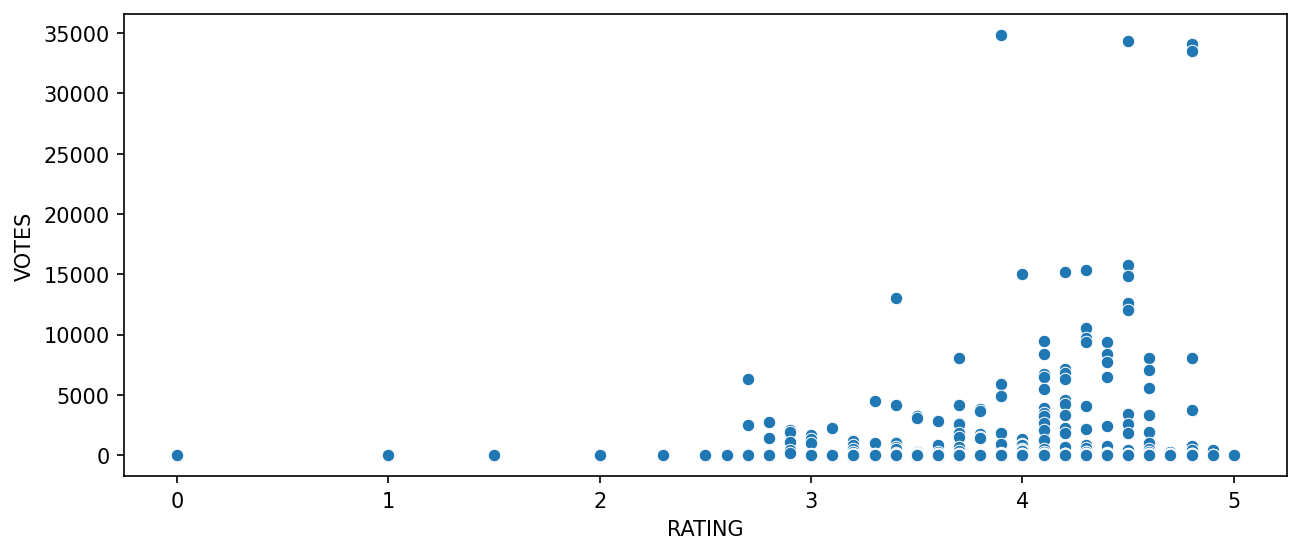

In [37]:
# scatterplot showing the relationship between rating and votes
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

#### Calculating the correlation between the columns

In [39]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [40]:
fandango.iloc[:,1:].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Striping the year from the title strings and set this new column as YEAR using Regex

In [42]:
fandango['YEAR'] = (
    fandango['FILM']
      .apply(lambda t: t.rsplit('(', 1)[-1].rstrip(')'))
      .astype('Int64')
)


In [43]:
fandango['YEAR'].isna().sum()   # how many missing?

0

In [44]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: Int64

<Axes: xlabel='YEAR', ylabel='count'>

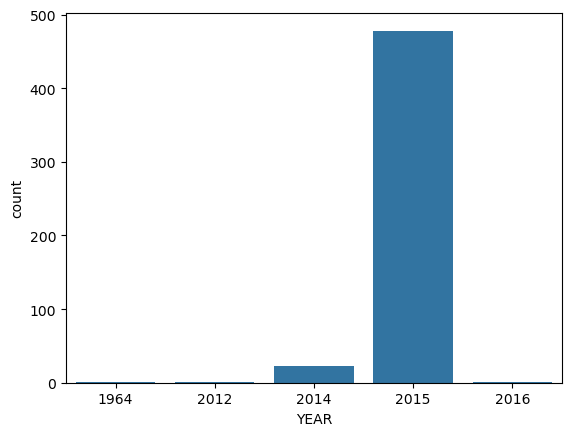

In [45]:
## Visualizing the count of movies per year with plot
sns.countplot(data=fandango,x='YEAR',color='C0')

 ### the 10 movies with the highest number of votes

In [47]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### movies that have zero votes 

In [49]:
no_votes = fandango['VOTES']==0
no_votes.sum()

69

### DataFrame of only reviewed films by removing any films that have zero votes.

In [51]:
fan_reviewed = fandango[fandango['VOTES']>0].copy()

### As indicated from the article the true user rating may be slightly different than the rating shown to a user. Thus we visualize the ditribution below using a Kernel Density Estimate plot

#### The Kde Plot displays the distribution of ratings(STARS) versus what the true rating from people votes

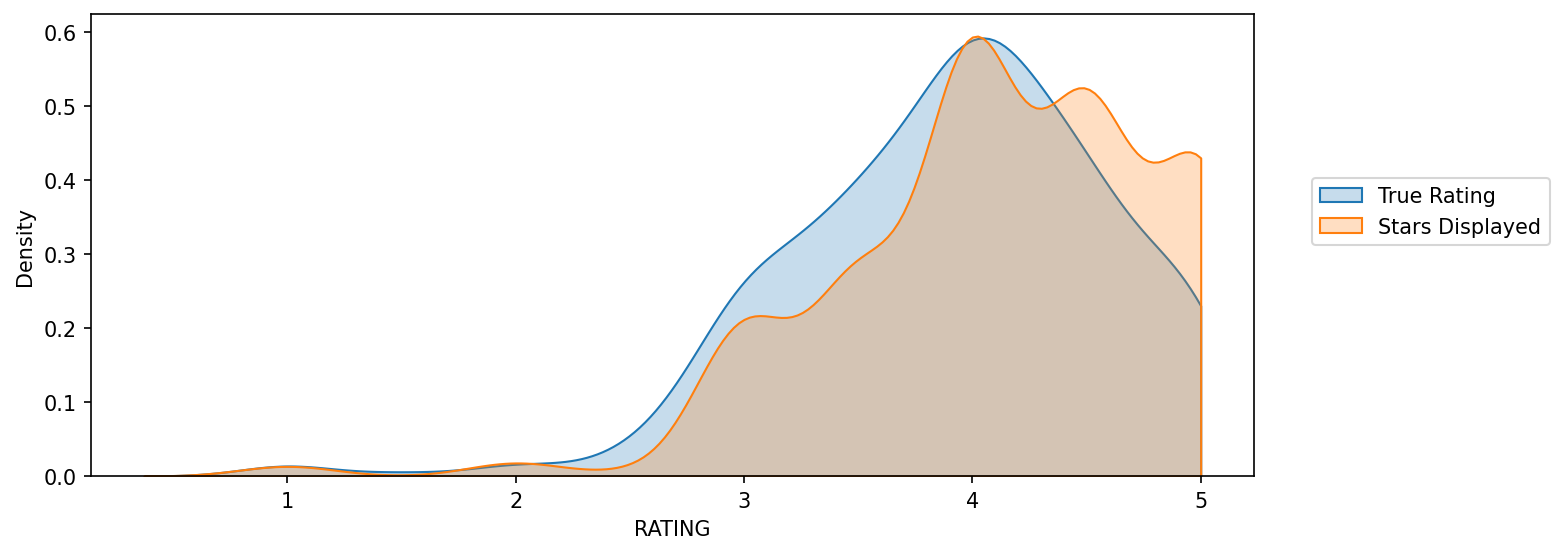

In [54]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

#### quantifying this discrepancy, we create a new column of the different between STARS displayed versus true RATING

In [56]:
# difference to 1 decimal place

fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(1)


In [57]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


#### Below is a count plot to display the number of times a certain difference occured

<Axes: xlabel='STARS_DIFF', ylabel='count'>

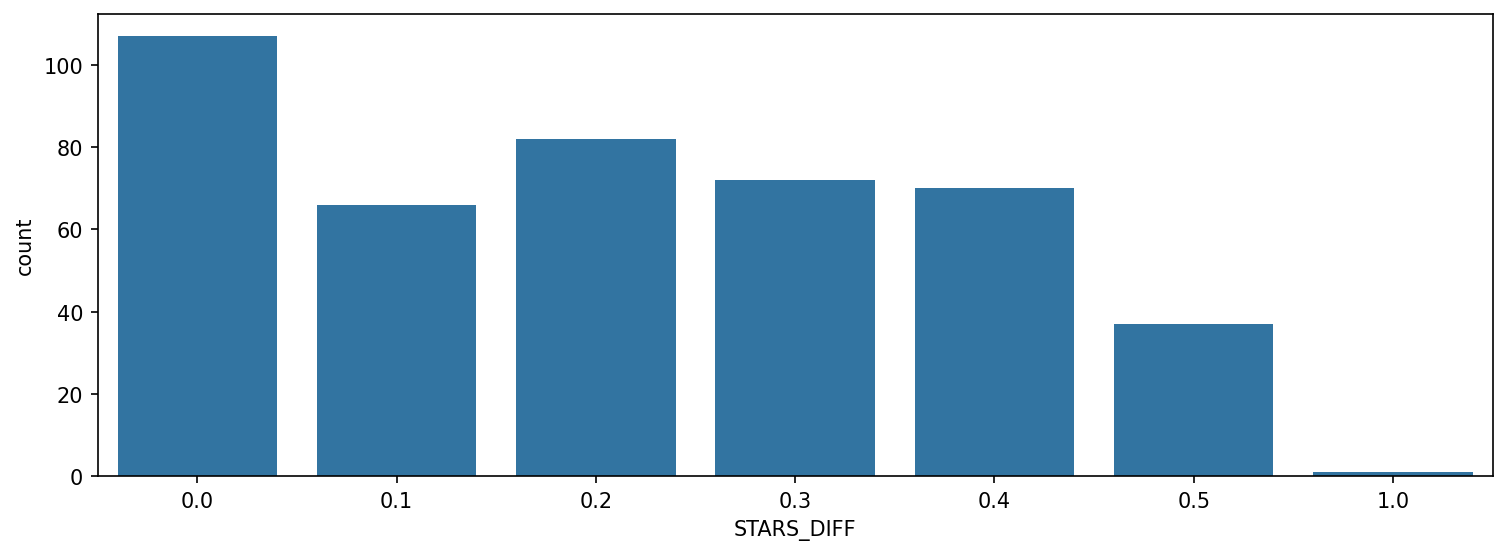

In [59]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', color='C0')


### From the plot one movie displayed a 1 star difference than its true rating , this movie is found below from the code 

In [61]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Site

comparing the scores from Fandango to other movies sites.

In [64]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [65]:
# First 5 rows
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [66]:
# Structural info
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [67]:
# Statistical data
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Taking a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (These are ratings published by official critics) and then the user reviews. 



#### A scatterplot exploring the relationship between RT Critic reviews and RT User reviews below

(0.0, 100.0)

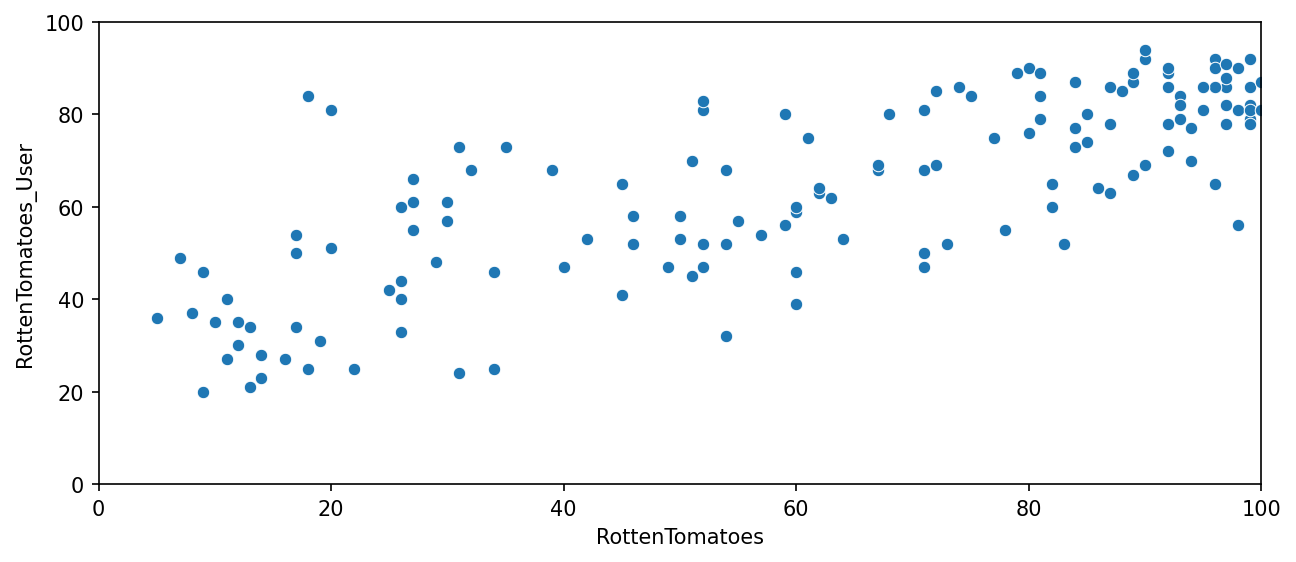

In [70]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

#### Next is to quantify this difference by comparing the critics ratings and the RT User ratings. That is ==> [RottenTomatoes-RottenTomatoes_User] 


In [72]:
# New column created for the difference
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

#### the Mean Absolute Difference between RT scores and RT User scores as described above.

In [74]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

#### Histogram Plot of the distribution of the differences between RT Critics Score and RT User Score

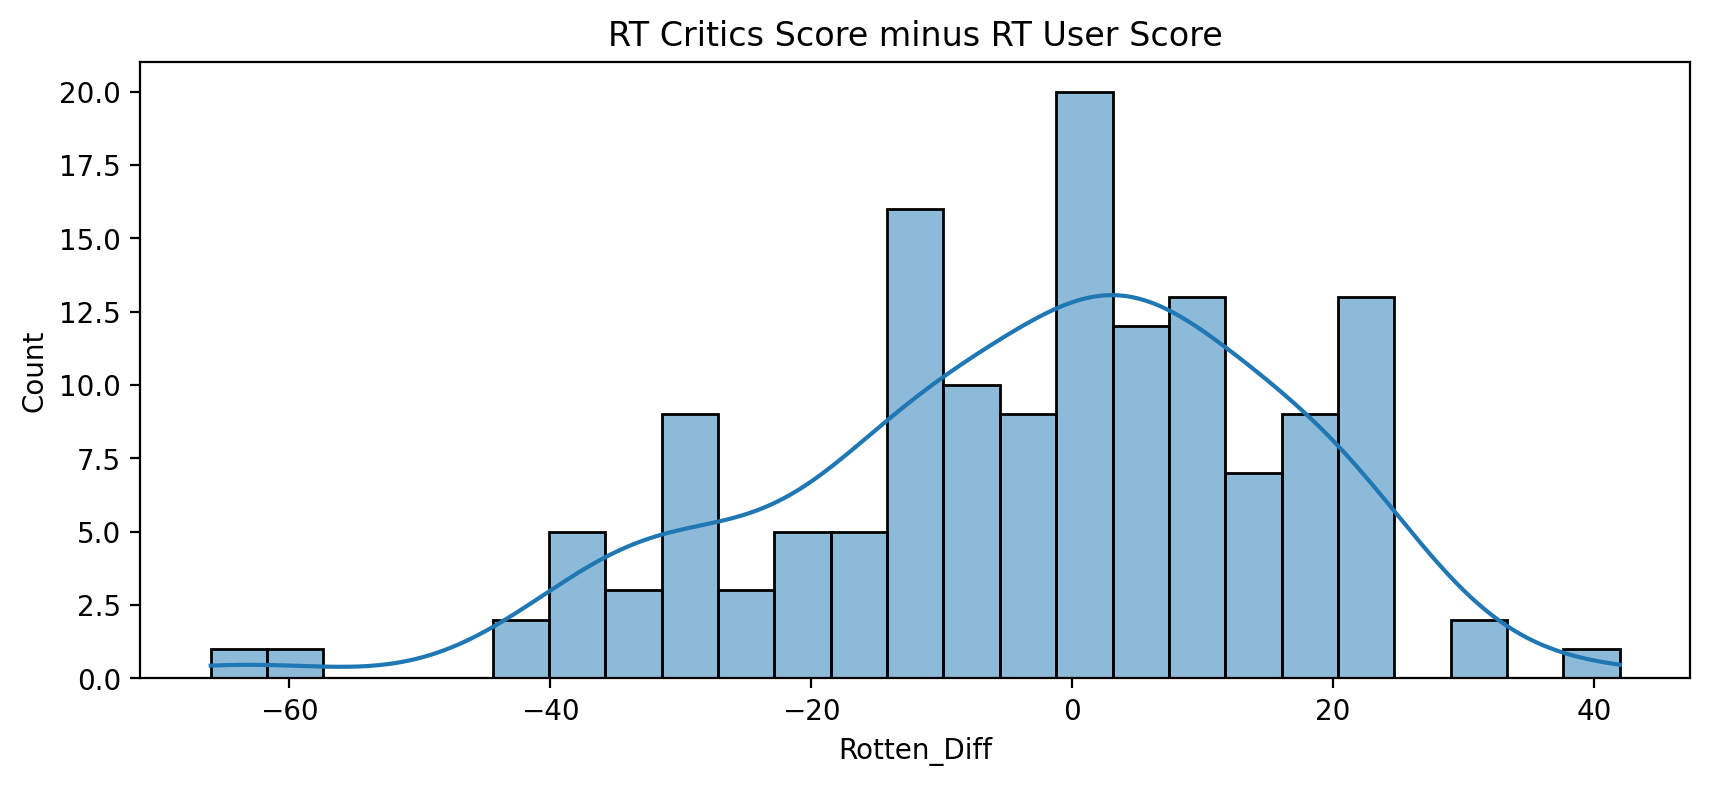

In [76]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

#### Histogram Plot of the distribution of the absolute differences between RT Critics Score and RT User Score

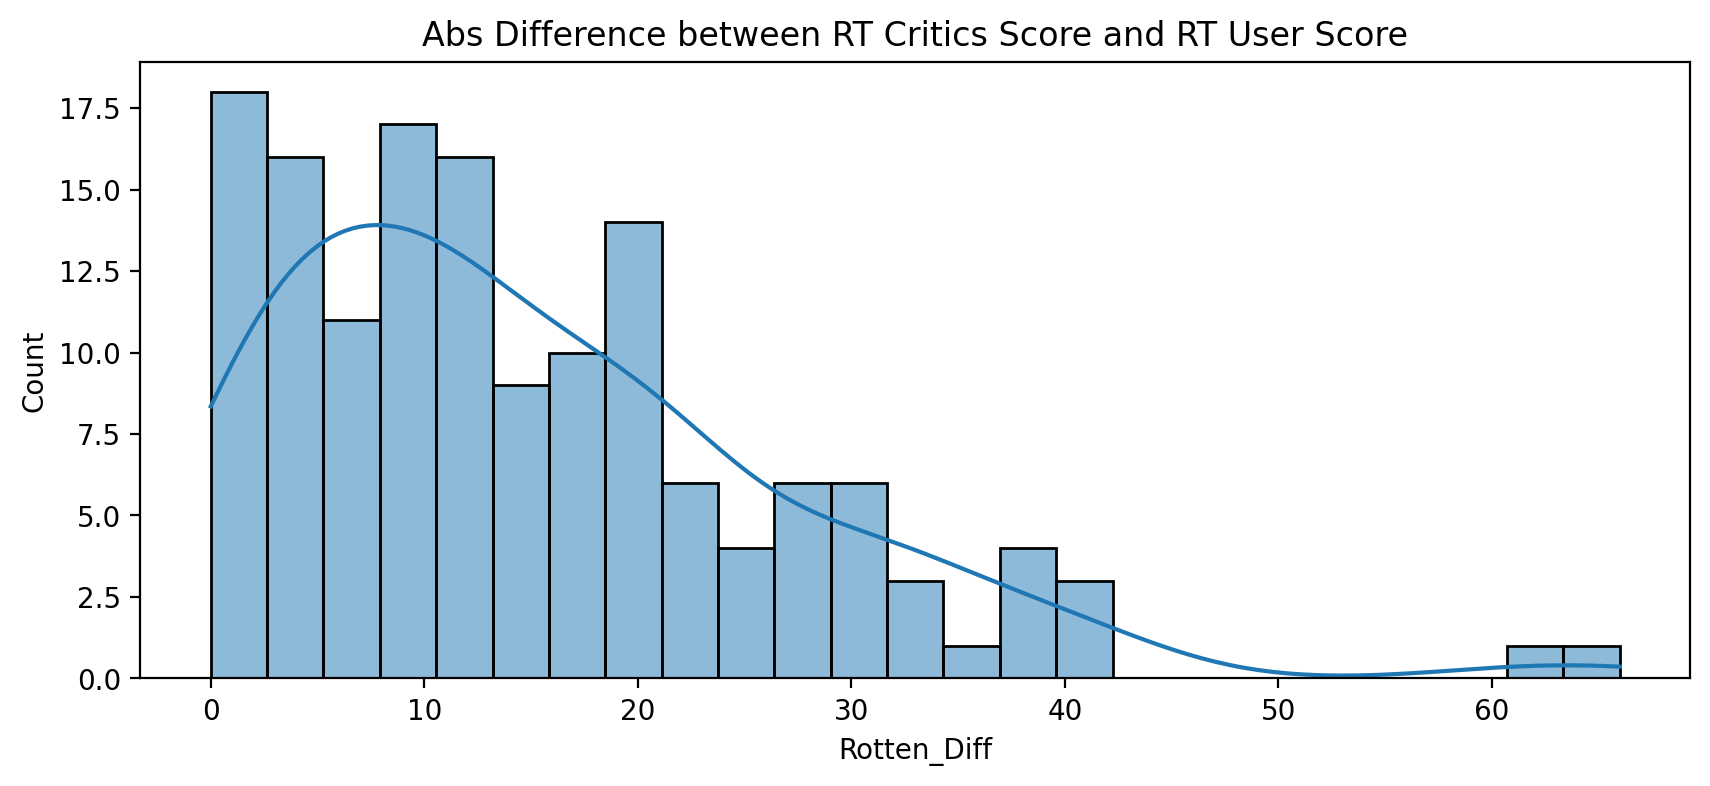

In [78]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

the top 5 movies users rated higher than critics on average

In [80]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Now we check to see the top 5 movies critics scores higher than users on average

In [82]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic
Examining the ratings from MetaCritic. Metacritic like fandango also shows an average user rating versus their official displayed rating.

##### Below is a scatterplot of the Metacritic Rating versus the Metacritic User rating.

(0.0, 10.0)

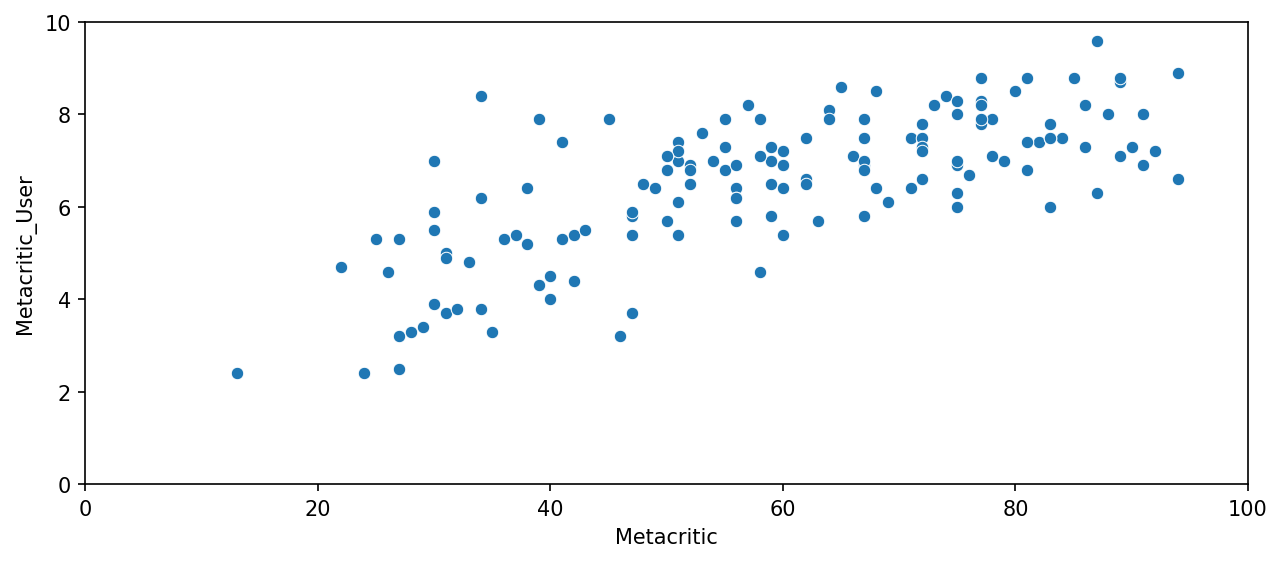

In [85]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

### IMBD

exploring IMDB. Here we analyze the most popular movies.


##### A scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

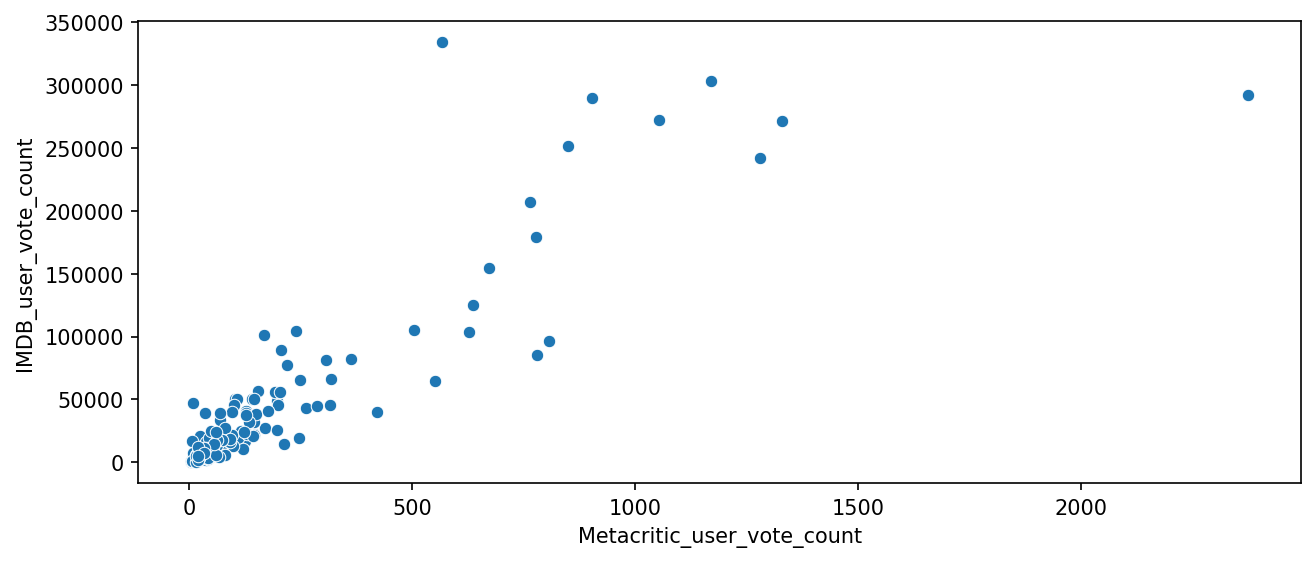

In [112]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

#### Notice here that there are two outliers here. The movie with the highest vote count on IMDB with only about 500 Metacritic ratings and also the movie with highest vote count on Metacritic.

So we find these movie



In [114]:
# What movie has the highest IMDB user vote count
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [145]:
# What movie has the highest Metacritic User Vote count
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites (This is the Major Goal of this Project)

### Here we try to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

We start off by combining the Fandango Table(Dataset) with the All Sites table(Dataset).

Because not every movie in the Fandango table is in the All Sites table.

Thus we only want to compare movies that are in both DataFrames

In [150]:
merged_df = pd.merge(fandango, all_sites,on='FILM',how='inner')

In [152]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    Int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: Int64(1), float64(4), int64(7), 

In [156]:
merged_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


The next step is to normalize these columns to Fandango STARS and RATINGS 0-5.
Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. 

This is important because, in order to do a fair comparison, we need to normalize these values so they all fall between the same range (0-5 stars)

Using the division method:

100/20 = 5

10/2 = 5

In [178]:
df_norm = merged_df.copy()      # keeps the original df untouched


In [180]:
# Rotten Tomatoes (critics and users) ──────────
df_norm['RT_norm']      = (df_norm['RottenTomatoes']      / 20).round(1)
df_norm['RT_user_norm'] = (df_norm['RottenTomatoes_User'] / 20).round(1)

# Metacritic (critics and users) ───────────────
df_norm['MC_norm']      = (df_norm['Metacritic']          / 20).round(1)
df_norm['MC_user_norm'] = (df_norm['Metacritic_User']     /  2).round(1)

# IMDb ─────────────────────────────────────────
df_norm['IMDB_norm']    = (df_norm['IMDB']                /  2).round(1)


In [182]:
# Focuing on the normalized column
df_norm[['FILM', 'STARS', 'RT_norm', 'MC_norm', 'IMDB_norm']].head()


,FILM,STARS,RT_norm,MC_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,1.2,2.3,2.1
1,Jurassic World (2015),4.5,3.6,3.0,3.6
2,American Sniper (2015),5.0,3.6,3.6,3.7
3,Furious 7 (2015),5.0,4.0,3.4,3.7
4,Inside Out (2015),4.5,4.9,4.7,4.3


Comparing Distribution of Scores Across Sites

For the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?




### Below is a Kde plot comparing the| distributions of normalized ratings across all sites

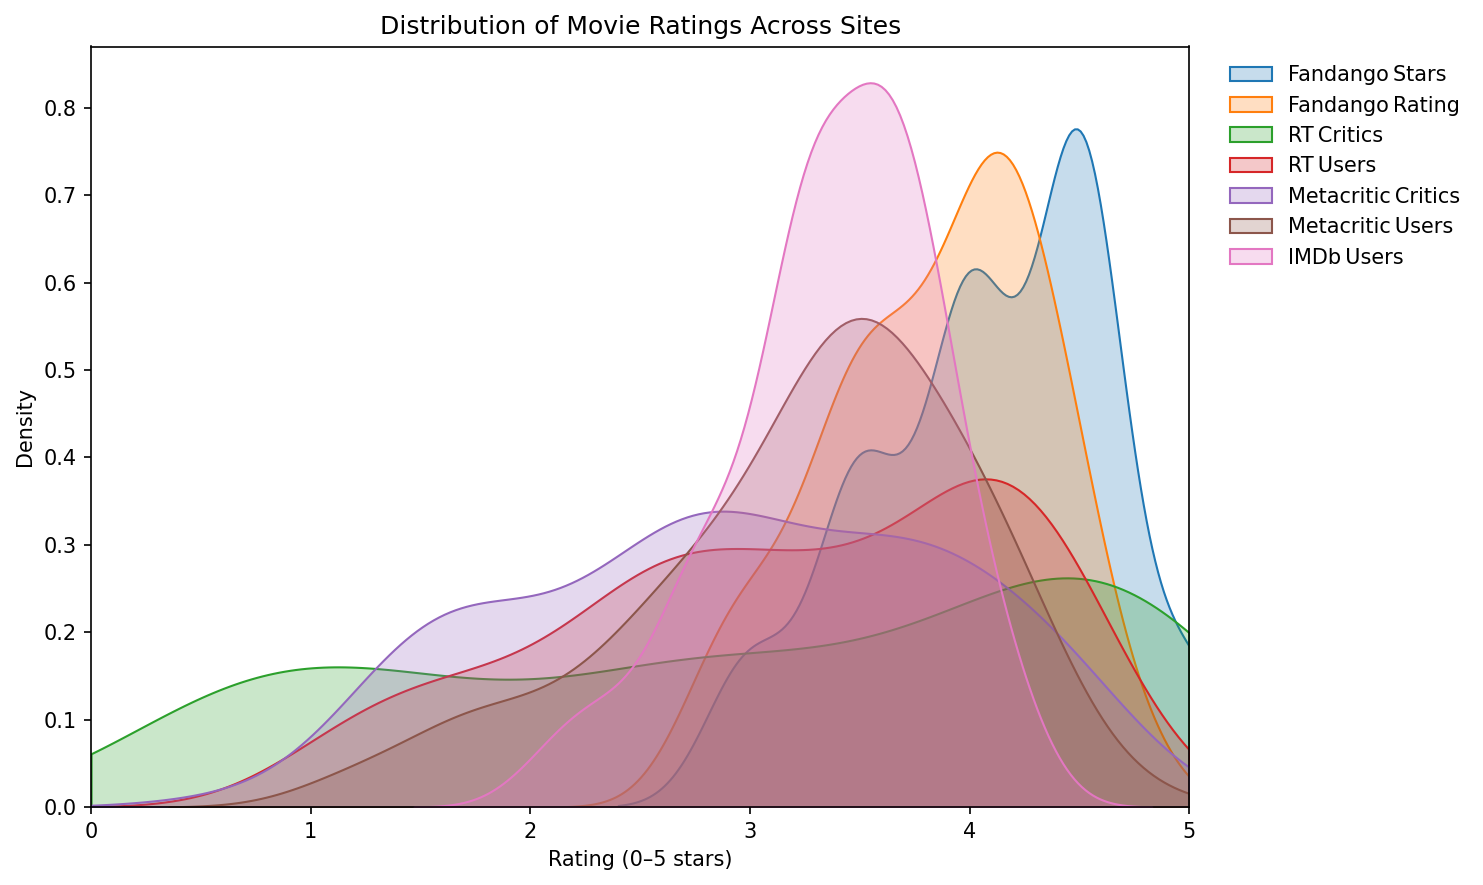

In [195]:
# KDE PLOT WITH ALL CURVES 
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(df_norm['STARS'],           fill=True, label='Fandango Stars',       clip=[0,5])
sns.kdeplot(df_norm['RATING'],          fill=True, label='Fandango Rating',      clip=[0,5])
sns.kdeplot(df_norm['RT_norm'],         fill=True, label='RT Critics',           clip=[0,5])
sns.kdeplot(df_norm['RT_user_norm'],    fill=True, label='RT Users',             clip=[0,5])
sns.kdeplot(df_norm['MC_norm'],         fill=True, label='Metacritic Critics',   clip=[0,5])
sns.kdeplot(df_norm['MC_user_norm'],    fill=True, label='Metacritic Users',     clip=[0,5])
sns.kdeplot(df_norm['IMDB_norm'],       fill=True, label='IMDb Users',           clip=[0,5])

plt.xlim(0, 5)
plt.xlabel('Rating (0–5 stars)')
plt.title('Distribution of Movie Ratings Across Sites')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), frameon=False)
plt.tight_layout()
plt.show()

As clearly shown above Fandango has an uneven distribution. While the RT critics have the most uniform distribution.
Thus we directly compare these two.

### Below is a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

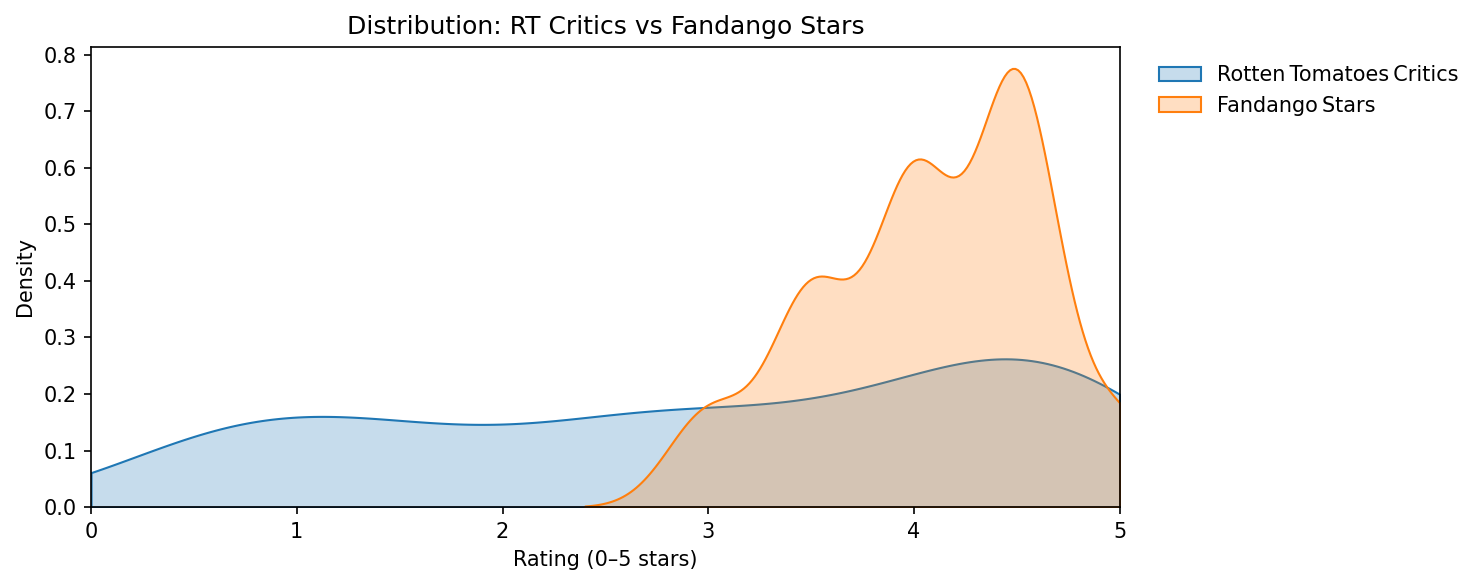

In [204]:
plt.figure(figsize=(10, 4), dpi=150)

# KDE curves
sns.kdeplot(df_norm['RT_norm'], fill=True, label='Rotten Tomatoes Critics', clip=[0, 5])
sns.kdeplot(df_norm['STARS'],   fill=True, label='Fandango Stars',         clip=[0, 5])

# Axes & title
plt.xlim(0, 5)
plt.xlabel('Rating (0–5 stars)')
plt.title('Distribution: RT Critics vs Fandango Stars')

# Legend moved outside so it doesn’t hide the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
plt.tight_layout()
plt.show()


In [ ]:
How about how the worst movies are rated across all platforms

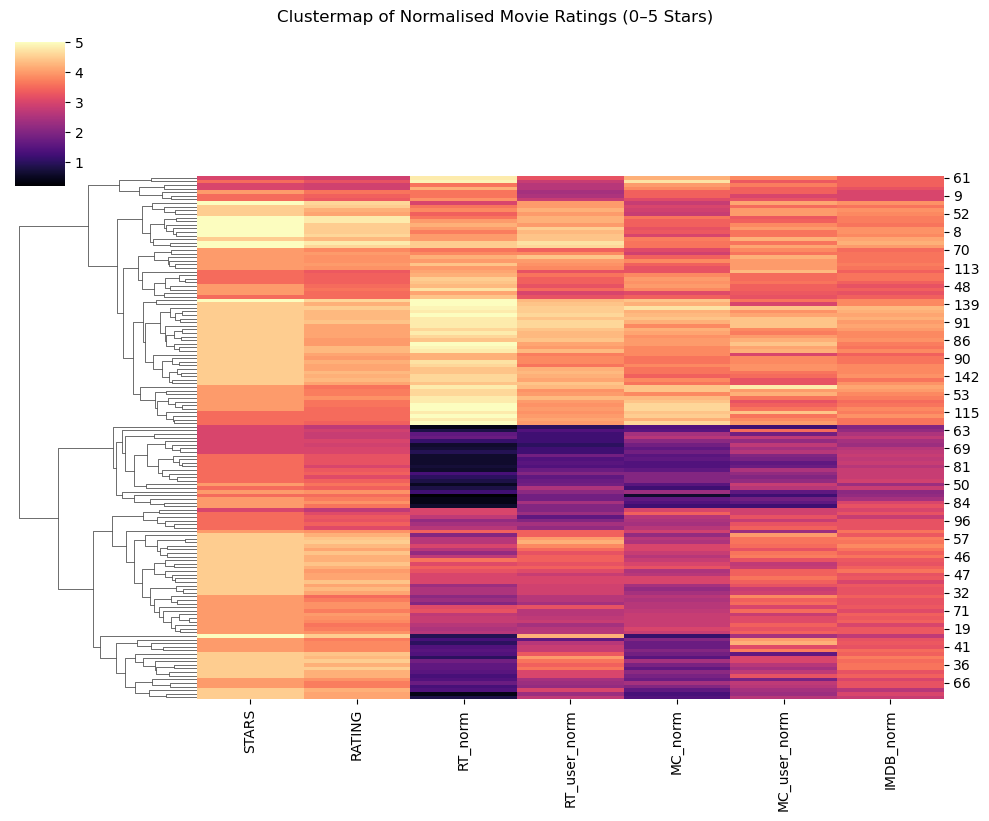

In [233]:
# pick the normalised 0‑5 columns (same as before)
cols = ['STARS', 'RATING',          # Fandango
        'RT_norm', 'RT_user_norm',  # Rotten Tomatoes
        'MC_norm', 'MC_user_norm',  # Metacritic
        'IMDB_norm']                # IMDb

norm_scores = df_norm[cols]         # no FILM titles

# clustermap ==> here the rows are clustered, while columns are left in original order
sns.clustermap(norm_scores,
               cmap='magma',
               col_cluster=False,   # ← this makes it match your tutor’s plot
               metric='euclidean',
               method='average',
               figsize=(10, 8)
               # standard_scale=1   # leave off for same colour scale as tutor
)

plt.suptitle('Clustermap of Normalised Movie Ratings (0–5 Stars)', y=1.02)
plt.show()

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating

#### Now we examine the top 10 worst movies.

#### Based off the Rotten Tomatoes Critic Ratings, we find;

what the top 10 lowest rated movies are
What the normalized scores across all platforms are for these movies

In [247]:
# Note here we add the film coloumn back

norm_films = df_norm[['STARS','RATING','RT_norm','RT_user_norm','MC_norm','MC_user_norm','IMDB_norm','FILM']]

In [249]:
norm_films.nsmallest(10,'RT_norm')

,STARS,RATING,RT_norm,RT_user_norm,MC_norm,MC_user_norm,IMDB_norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


### Visualization of the distribution of ratings across all sites for the top 10 worst movies shown below

In [261]:
def move_legend(ax, new_loc, **kws):
    """Re‑draw the existing legend somewhere else."""
    handles, labels = ax.get_legend_handles_labels()
    title = ax.get_legend().get_title().get_text() if ax.get_legend() else None
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


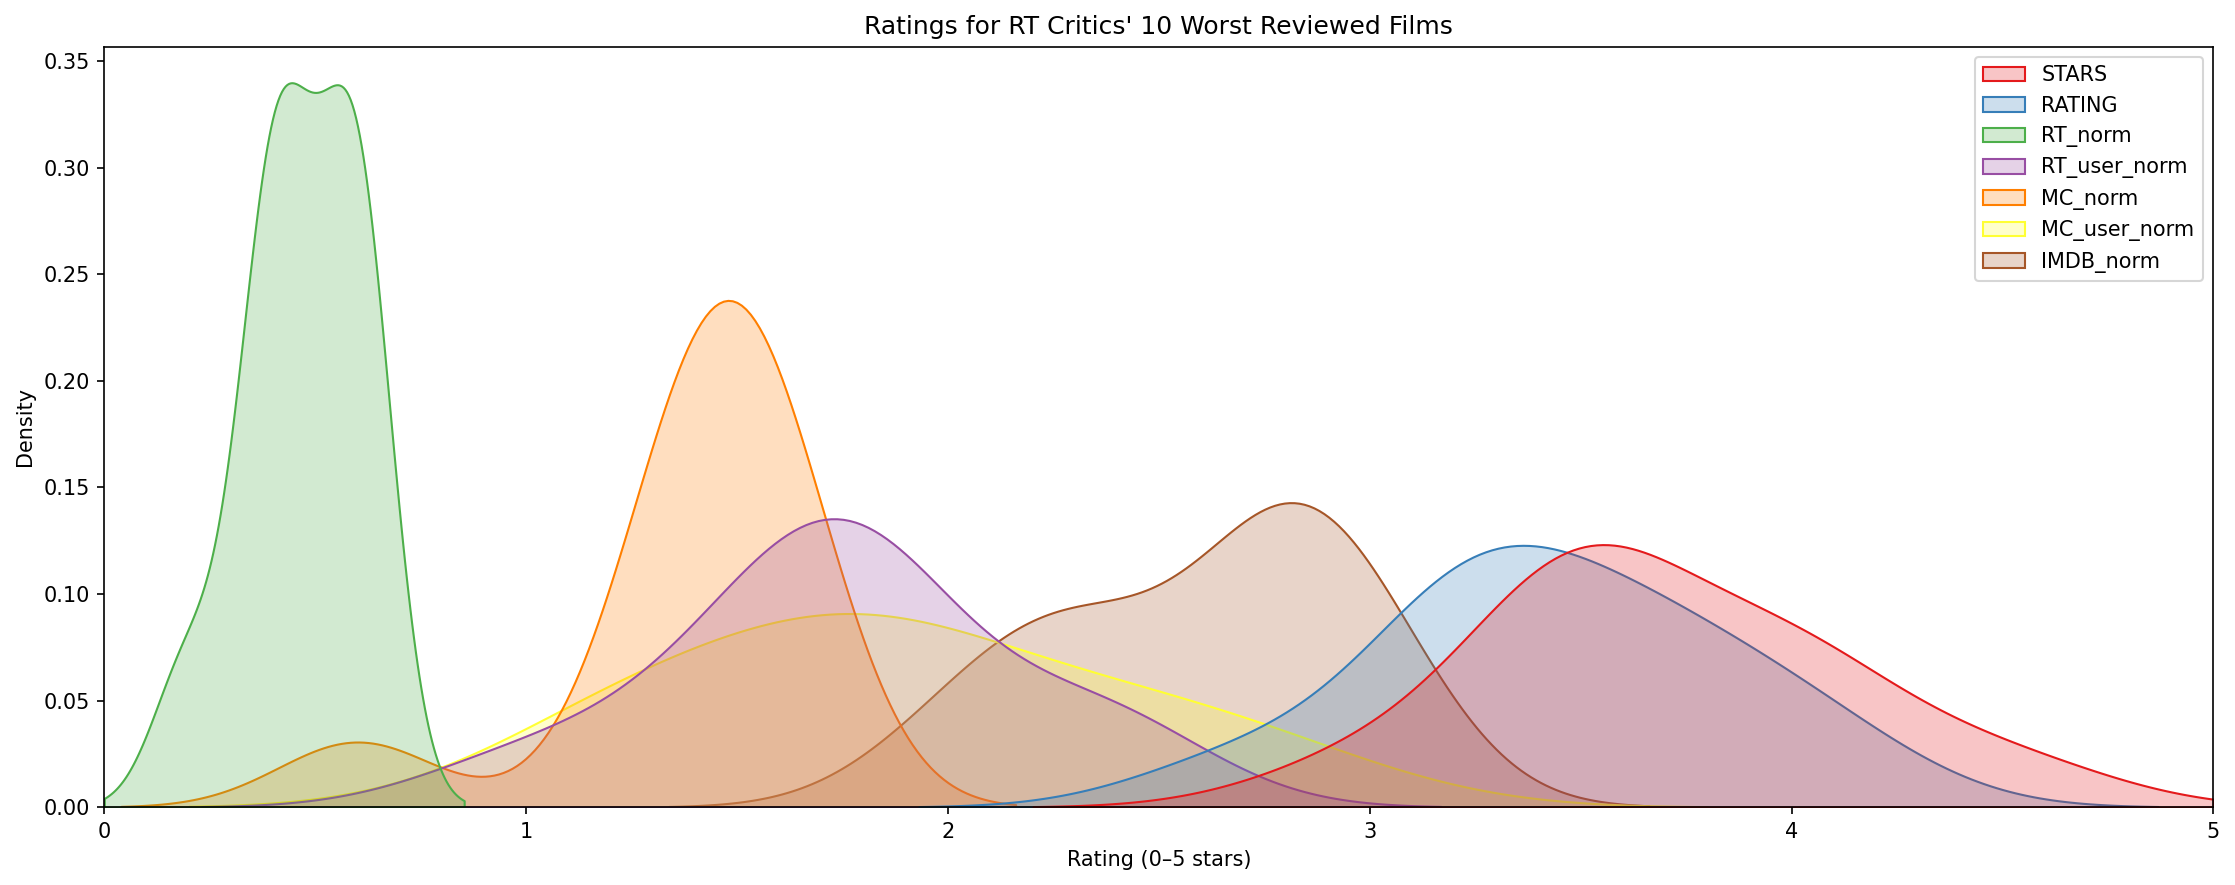

In [275]:
print('\n') # Blank line for neat console output

plt.figure(figsize=(15, 6), dpi=150)

# 10 lowest RT‑critic films
worst_films = (
    norm_films
      .nsmallest(10, 'RT_norm')        # pick bottom‑10 on RT_Norm
      .drop(columns='FILM')  # drop non-numeric column
)


# This helper picks the right keyword automatically
kde_kwargs = dict(data=worst_films, clip=[0, 5], palette='Set1')
try:
    sns.kdeplot(fill=True, **kde_kwargs)      # new versions
except TypeError:
    sns.kdeplot(shade=True, **kde_kwargs)     # fallback for old versions 

plt.title("Ratings for RT Critics' 10 Worst Reviewed Films")
plt.xlim(0, 5)
plt.xlabel('Rating (0–5 stars)')
plt.tight_layout()
plt.show()


---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Fandango is shows around 3-4 star ratings for films that are clearly bad! For Example: For [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displays 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [298]:
norm_films.iloc[25]

STARS                      4.5
RATING                     4.1
RT_norm                    0.4
RT_user_norm               2.3
MC_norm                    1.3
MC_user_norm               2.3
IMDB_norm                  3.0
FILM            Taken 3 (2015)
Name: 25, dtype: object

In [304]:
Average_ratings_across_platforms = (0.4+2.3+1.3+2.3+3)/5

In [306]:
print(Average_ratings_across_platforms)

1.86
